In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from skimage import draw

In [18]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 300

In [3]:
#asset_path = "/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/"
asset_path = "/home/dan/Data/projects/reinforcement/carla-bev-env/CarlaBEV/assets/"
# asset_path = "/home/aisyslab/DanielM/projects/carla-bev-env/CarlaBEV/assets/"

map_file = "Town01-padded.jpg"

map_path = os.path.join(asset_path, map_file)

map_1024 = Image.open(map_path)
map_1024.size


(8192, 10240)

In [4]:
def resize(im, factor):
    x, y = im.size
    return im.resize((int(x/factor), int(y/factor)))

x, y = map_1024.size

In [8]:
map_1024.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-1024.jpg")
map_512.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-512.jpg")
map_256.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-256.jpg")
map_128.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-128.jpg")
map_64.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-64.jpg")

In [5]:
def scale_coords(coord, factor):
    return np.array(
        [int(coord[0] / factor), int(coord[1] / factor)]
    )

In [6]:
map_128 = resize(map_1024, 8)
map_512 = resize(map_1024, 2)

In [7]:
target_locations = [
    (8700, 2000),
    (8700, 2250),
    (8700, 2500),
    (8700, 2750),
    (8700, 3000),
    (8700, 3250),
    (8700, 3500),
    (8700, 3750),        
    (8700, 4000),        
    (8700, 4250),        
    (8700, 4500),
    (8700, 4750),        
    (8700, 5000),        
    (8700, 5250),        
    (8700, 5500),
    (8700, 5750),        
    (8700, 6000),        
    (8700, 6250),        
    (8700, 6500),
    (8700, 6650),
    (8650, 6800),
    (8500, 6800),
    (8400, 6800),
    
    (8250, 6800),
    (8050, 6800),
    (7850, 6800),
    (7650, 6800),
    (7450, 6800),

    (7250, 6700),
    (7250, 6500),
    (7250, 6300),
    (7250, 6100),
    (7250, 5900),
    (7250, 5700),
    (7250, 5500),
    (7250, 5300),
    (7250, 5100),
    (7250, 4900),
    (7250, 4700)
]

agent_loc = (8700, 1750)

In [40]:
ckpt_pos = [
    (8704, 2000),
    (8704, 2250),
    (8704, 2500),
    (8704, 2750),
    (8704, 3000),
    (8704, 3250),
    (8704, 3500),
    (8704, 3750),        
    (8704, 4000),        
    (8704, 4250),        
    (8704, 4500),
    (8704, 4750),        
    (8704, 5000),        
    (8704, 5250),        
    (8704, 5500),
    (8704, 5750),        
    (8704, 6000),        
    (8704, 6250),        
    (8704, 6500),
    (8704, 6650),
    ]

agent_loc = (8730, 1750)

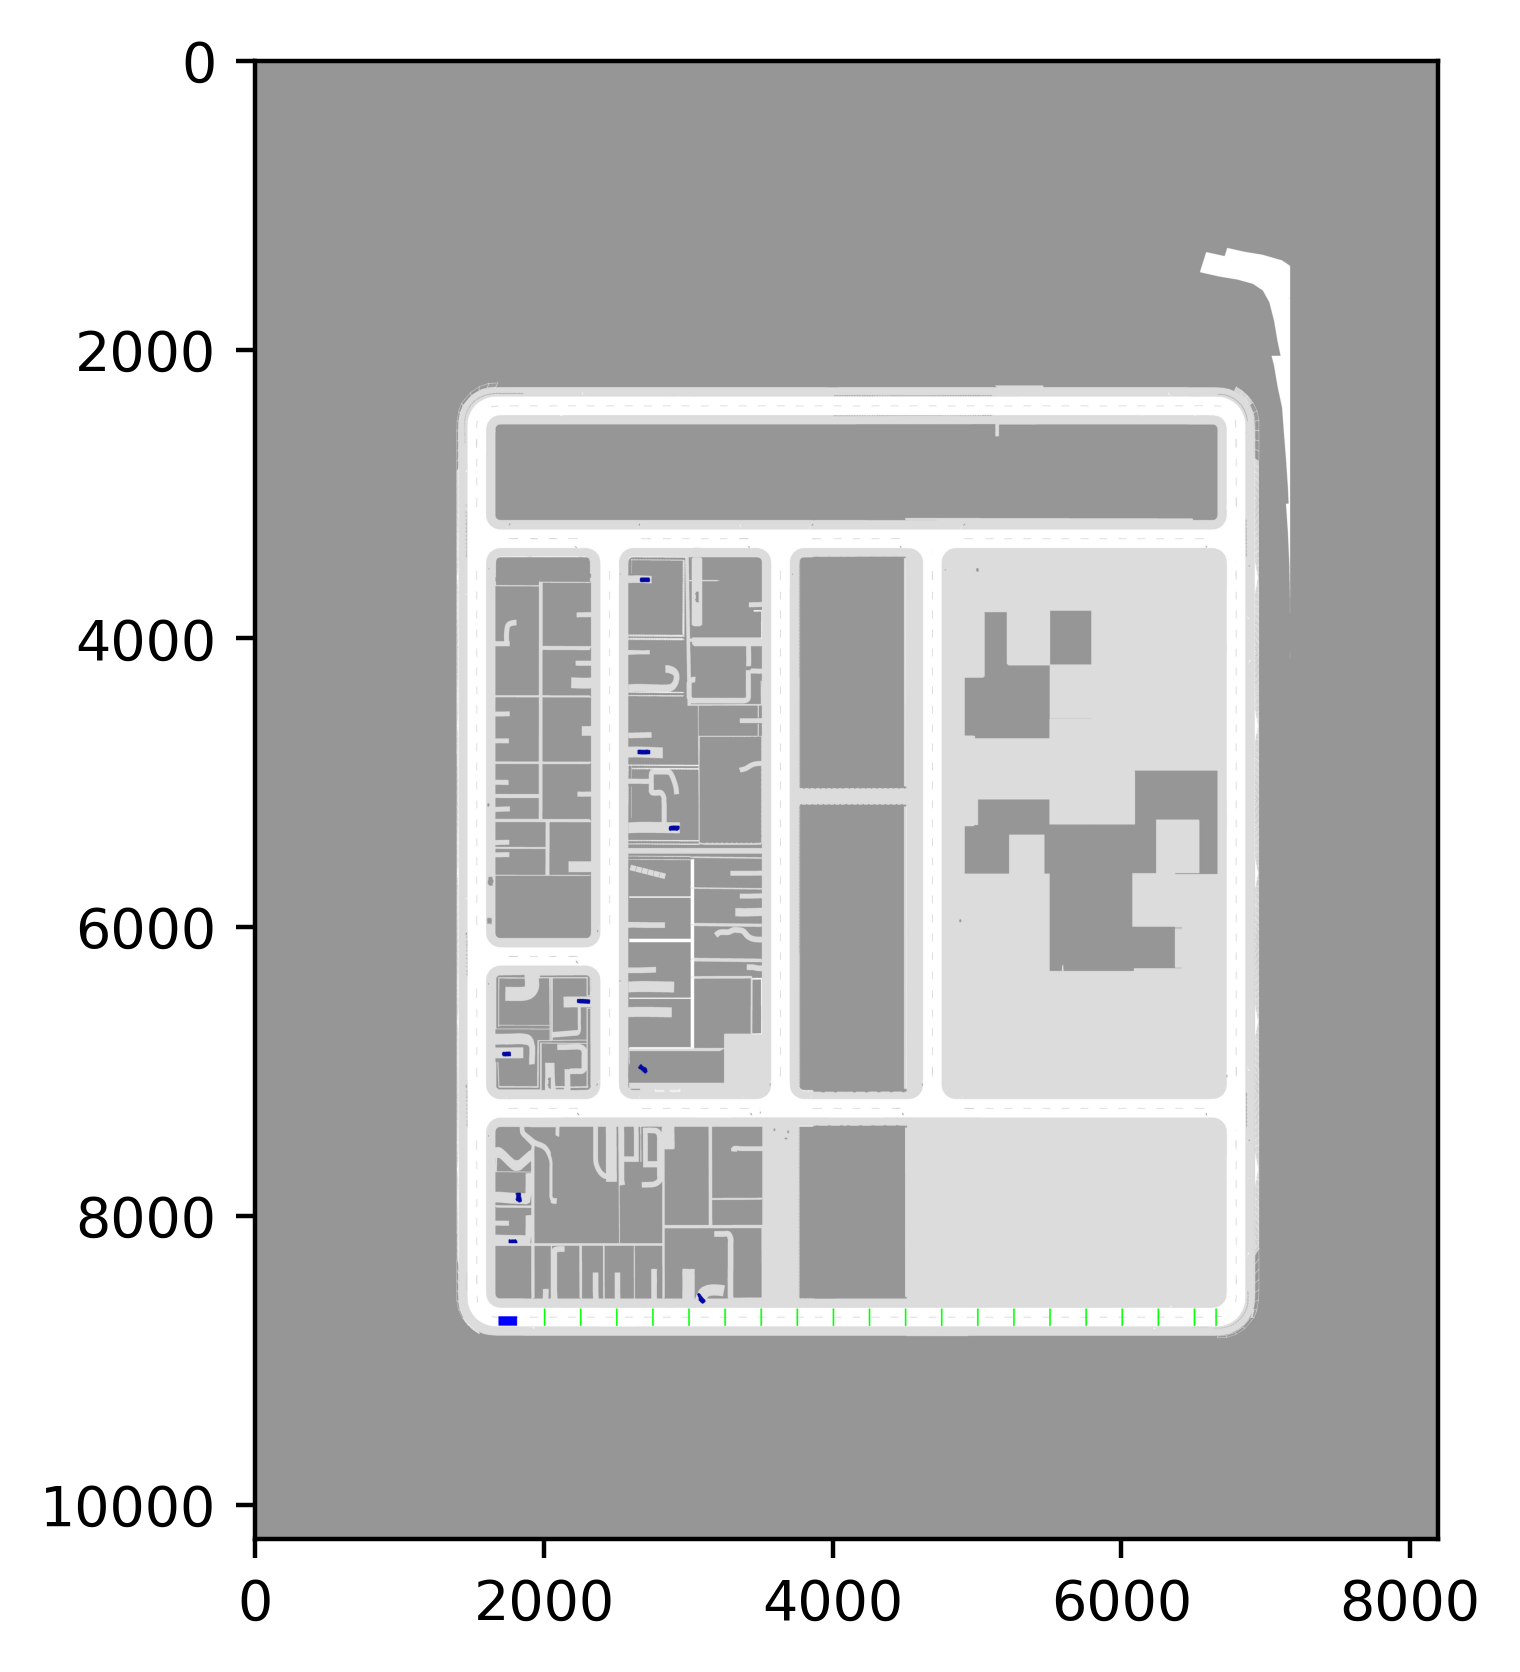

In [41]:
arr = np.array(map_1024)
scale_factor = 1
offset = 0
r = 20

car_size = int(32/scale_factor)

length = int(60/scale_factor)
width = int(10/scale_factor)

for location in ckpt_pos:
    row, col = scale_coords(location, scale_factor)
    rr, cc = draw.rectangle(start=(row-length, col), end=(row+length, col + width))
    arr[rr, cc] = (0, 255, 0)
#     rr, cc = draw.line(8650, 2000, 8750, 2000)

#     # rr, cc = draw.disk(scale_coords(loc, scale_factor), radius=r)
#     arr[rr, cc] = (0, 255, 0)

row, col = scale_coords(agent_loc, scale_factor)
rr, cc = draw.rectangle(start=(row-car_size, col - car_size*2), end=(row+car_size, col + car_size*2))
arr[rr, cc] = (0, 0, 255)

plt.imshow(arr)
plt.show()